# FIT5149 S2 2020 
# Assessment 1: Predict Bike-Sharing need in Metropolitan Area


Student information
- Family Name: Deshmukh
- Given Name:Ashwin Avinash
- Student ID: 30488745
- Student email: ades0016@student.monash.edu

Programming Language: R 3.5.1 in Jupyter Notebook



## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
3. [Exploratory Data Analysis](#sec_3)
4. [Model Development](#sec_5)
5. [Conclusion](#sec_7)
6. [References](#sec_8)

## Introduction <a class="anchor" id="sec_1"></a>

In [1]:
library(ggplot2)
library(reshape2)
library(stats)
library(scales)
library(grid)
library(gridExtra)
library(RColorBrewer)
library(ISLR)
library(GGally)
library(gridExtra)
library(cowplot)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'reshape2' was built under R version 3.6.3"Warning message:
"package 'scales' was built under R version 3.6.3"Warning message:
"package 'gridExtra' was built under R version 3.6.3"Warning message:
"package 'ISLR' was built under R version 3.6.3"Warning message:
"package 'GGally' was built under R version 3.6.3"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2
Warning message:
"package 'cowplot' was built under R version 3.6.3"

## Data Exploration<a class="anchor" id="sec_2"></a>

In [2]:
#reading the training and test dataset
train<-read.csv('train.csv')
test<-read.csv('test.csv')

In [3]:
dim(train)

[1] 7008   14

The train dataset has 14 columns and 7008 rows

In [4]:
dim(test)

[1] 1752   14

The test dataset has 14 columns and 1752 rows

Let's take a look at some statistical description of the train dataset.

In [5]:
#install.packages('psych')
library(psych)
round(describe(train))


Warning message:
"package 'psych' was built under R version 3.6.3"
Attaching package: 'psych'

The following objects are masked from 'package:scales':

    alpha, rescale

The following objects are masked from 'package:ggplot2':

    %+%, alpha



vars n    mean sd  median trimmed mad min max  range skew
Date*                  1   7008  183 105  183    183    135   1  365  364   0  
Rented.Bike.Count      2   7008  703 646  503    611    557   0 3556 3556   1  
Hour                   3   7008   11   7   11     11      9   0   23   23   0  
Temperature            4   7008   13  12   14     13     14 -18   39   57   0  
Humidity               5   7008   58  20   57     58     24   0   98   98   0  
Wind.speed             6   7008    2   1    2      2      1   0    7    7   1  
Visibility             7   7008 1436 609 1693   1509    455  27 2000 1973  -1  
Dew.point.temperature  8   7008    4  13    5      5     15 -31   27   57   0  
Solar.Radiation        9   7008    1   1    0      0      0   0    4    4   1  
Rainfall              10   7008    0   1    0      0      0   0   35   35  15  
Snowfall              11   7008    0   0    0      0      0   0    9    9   8  
Seasons*              12   7008    2   1    2      2      1   1    4    3   0  
Holiday*              13   7008    2   0    2      2      0   1    2    1  -4  
Functioning.Day*      14   7008    2   0    2      2      0   1    2    1  -5  
                      kurtosis se
Date*                  -1      1 
Rented.Bike.Count       1      8 
Hour                   -1      0 
Temperature            -1      0 
Humidity               -1      0 
Wind.speed              1      0 
Visibility             -1      7 
Dew.point.temperature  -1      0 
Solar.Radiation         1      0 
Rainfall              292      0 
Snowfall               84      0 
Seasons*               -1      0 
Holiday*               15      0 
Functioning.Day*       24      0

1. Visibility, Holiday,Functioning.Day are negatively skewed.
2. The minimum for rented.bike.count, hour,humidity,wind speed,solar radiation,rainfall,snowfall is 0. I believe there are values which are too small to register.
3. Moreover, the range for rented.bike.count and visibility is quite high.
4. Holiday and Functioning.Day have a vey small range.

##  Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

Let's take a look at few of these variables described above:

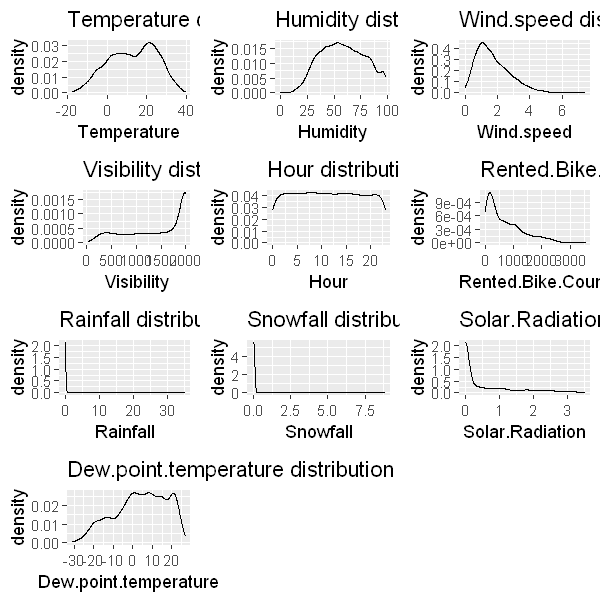

In [6]:
library(gridExtra) 
library(ggplot2) 
options(repr.plot.width = 5, repr.plot.height = 5)
p1<-ggplot(aes(x=Temperature), data =train) +
    geom_density() + 
    ggtitle('Temperature distribution')  #plot for temperature

p2<-ggplot(aes(x=Humidity),  data =train) +
    geom_density() +
    ggtitle('Humidity distribution')  #plot for Humidity

p3<-ggplot(aes(x=Wind.speed),  data =train) +
    geom_density()+
    ggtitle('Wind.speed distribution')  #plot for Wind.speed

p4<-ggplot(aes(x=Visibility),data =train) +
    geom_density() +
    ggtitle('Visibility distribution')  #plot for Visibility

p5<-ggplot(aes(x=Hour),data =train) +
    geom_density() +
    ggtitle('Hour distribution')   #plot for Hour

p6<-ggplot(aes(x=Rented.Bike.Count),data =train) +
    geom_density() +
    ggtitle('Rented.Bike.Count distribution')   #plot for Rented.Bike.Count
p7<-ggplot(aes(x=Rainfall),data =train) +
    geom_density() +
    ggtitle('Rainfall distribution')   #plot for Rainfall
p8<-ggplot(aes(x=Snowfall),data =train) +
   geom_density() +
    ggtitle('Snowfall distribution')   #plot for Snowfall
p9<-ggplot(aes(x= Solar.Radiation),data =train) +
    geom_density() +
    ggtitle('Solar.Radiation distribution')  #plot for Solar.Radiation
p10<-ggplot(aes(x=Dew.point.temperature),data =train) +
    geom_density() +
    ggtitle('Dew.point.temperature distribution') #plot for Dew.point.temperature

grid.arrange(p1, p2, p3, p4,p5,p6,p7,p8,p9,p10, ncol = 3)   # arrange all the graphs to display them together

The following observations are obtained from the above plots

The Temperature value seems to dispaly a normal distribution with major samples exhibiting values between 0 and 20.
Humidity and visibility skewed to the right and wind speed is skewed to the left.


Moreover, Solar Radiation, Rainfall and Snowfall and our demand i.e. Rented.Bike.Count are skewed towards the left wheras Dew.Point.Temperature is right skewed 

### Looking for outliers

As we know, boxplot is the best to detect the outliers. Hence we plot a boxplot for the train dataset.

Using Date, Seasons, Holiday as id variables


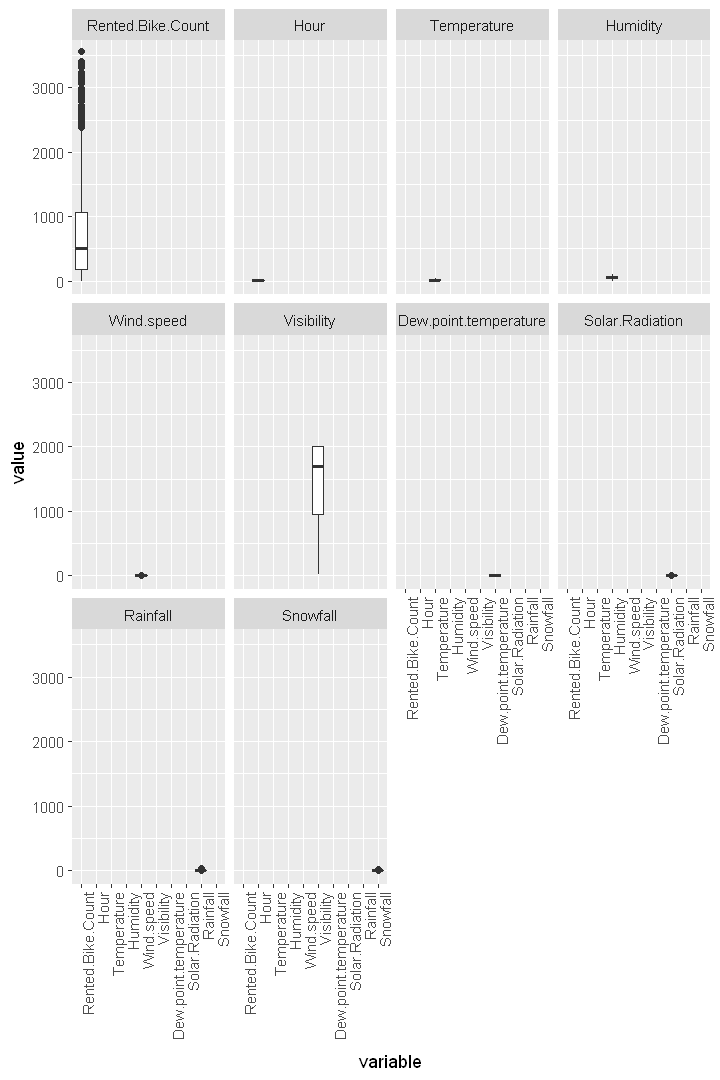

In [7]:
options(repr.plot.width = 6, repr.plot.height =9 )
m1 <- melt(as.data.frame(train[,-14]))
ggplot(m1,aes(x = variable,y = value)) + 
  facet_wrap(~variable) + 
  geom_boxplot()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))   # plotting boxplot for all variables
                      

Looking at the boxplot, it is clear that there are some outliers in Rainfall, Snowfall and Wind.speed variables. 

### Correlation between variables

We have taken a look at some important variables, now lets take a look at the correlation between them:

In [8]:
round(cor(train[2:11]),3)   # display table showing correlation values

Rented.Bike.Count Hour   Temperature Humidity Wind.speed
Rented.Bike.Count      1.000             0.413  0.541      -0.196    0.126    
Hour                   0.413             1.000  0.133      -0.239    0.290    
Temperature            0.541             0.133  1.000       0.156   -0.033    
Humidity              -0.196            -0.239  0.156       1.000   -0.343    
Wind.speed             0.126             0.290 -0.033      -0.343    1.000    
Visibility             0.201             0.106  0.041      -0.538    0.182    
Dew.point.temperature  0.383             0.011  0.912       0.535   -0.177    
Solar.Radiation        0.263             0.148  0.353      -0.467    0.333    
Rainfall              -0.121             0.010  0.049       0.233   -0.012    
Snowfall              -0.143            -0.034 -0.217       0.116   -0.015    
                      Visibility Dew.point.temperature Solar.Radiation Rainfall
Rented.Bike.Count      0.201      0.383                 0.263          -0.121  
Hour                   0.106      0.011                 0.148           0.010  
Temperature            0.041      0.912                 0.353           0.049  
Humidity              -0.538      0.535                -0.467           0.233  
Wind.speed             0.182     -0.177                 0.333          -0.012  
Visibility             1.000     -0.170                 0.147          -0.160  
Dew.point.temperature -0.170      1.000                 0.091           0.123  
Solar.Radiation        0.147      0.091                 1.000          -0.074  
Rainfall              -0.160      0.123                -0.074           1.000  
Snowfall              -0.130     -0.147                -0.073           0.015  
                      Snowfall
Rented.Bike.Count     -0.143  
Hour                  -0.034  
Temperature           -0.217  
Humidity               0.116  
Wind.speed            -0.015  
Visibility            -0.130  
Dew.point.temperature -0.147  
Solar.Radiation       -0.073  
Rainfall               0.015  
Snowfall               1.000

<b>Few Variables with positive correlation are:</b> <br>
Rented.Bike.Count and Temperature 0.541<br>
Humidity and Dew.Point.temperture 0.535	<br>
Temperature and Dew.Point.temperture 0.912(strong positive corelation)<br>
<b>Few Variables with negative correlation are: <br></b>
Humidity and visibility -0.538	<br>
Wkind speed and Temperature -0.033(Weak negative correlation)<br>


Now, lets look at this correlation using a graph:

In [9]:
# install.packages('GGally', repos = c('http://cran.ms.unimelb.edu.au'))
library(GGally) 


In [10]:
# References: https://lms.monash.edu/mod/resource/view.php?id=7438727 
colorRange <- c('#69091e', '#e37f65', 'white', '#aed2e6', '#042f60')
myColorRampFunc <- colorRamp(colorRange)

panel.cor <- function(w, z, ...) {
    correlation <- cor(w, z)

    
    col <- rgb(myColorRampFunc((1 + correlation) / 2 ) / 255 )

    
    radius <- sqrt(abs(correlation))
    radians <- seq(0, 2*pi, len = 50) 
    x <- radius * cos(radians)
    y <- radius * sin(radians)
   
    x <- c(x, tail(x,n=1))
    y <- c(y, tail(y,n=1))

    
    par(new=TRUE)
    plot(0, type='n', xlim=c(-1,1), ylim=c(-1,1), axes=FALSE, asp=1)
    polygon(x, y, border=col, col=col)
}

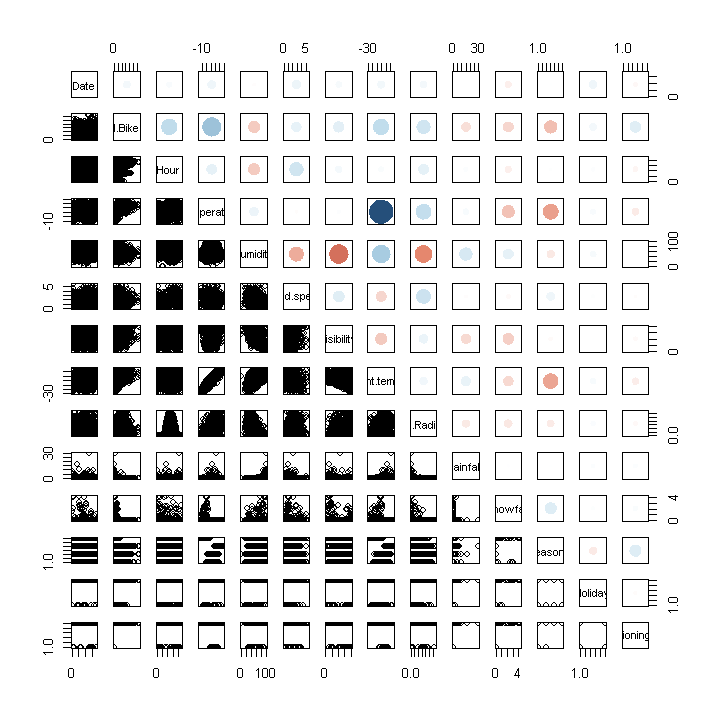

In [11]:
options(repr.plot.width = 6, repr.plot.height =6 )
pairs(train[sample.int(nrow(train),1000),], upper.panel=panel.cor)   # plots a graph for correlation between variables

From the graph above,
1. Rented.Bike.Count i.e. the response variable shows no clear correlation with the variables  Date and Holiday. 
2. The plot shows a positive correlation between the response variable and Hour. This is what we need to achieve as per the problem statement.
3. The response variable is positively correlated with temperature. This means temperature also plays a key role in the demand for bikes.
4. Humidity and Rented.Bike.Count have a negative correlation. The same goes with Rainfall,Snowfall and Seasons.
5. Wind speed, Visibility,Dew.point.temperature,Functioning.Day and solar radiation show a weak positive correlation with our response variable.
6. Moreover, There is a strong positive correlation between Temperature and Dew.Point.Temperature and Humidity. It will be interesting to see how our demand varies when these 3 variables change.

Let's look at the correlation of these vaiables with our demand in a deeper sense:

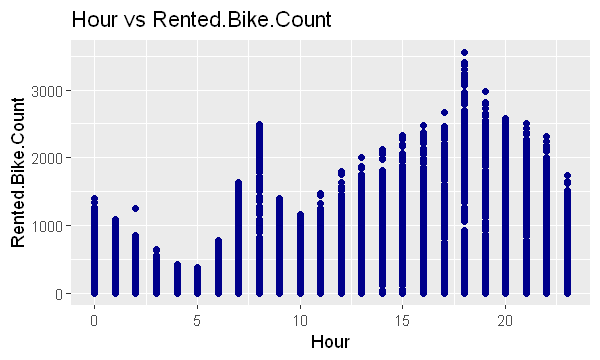

In [12]:
options(repr.plot.width = 5, repr.plot.height = 3)  # set plot window size
#plot for Hour vs Rented.Bike.Count 
ggplot(train, aes(x = Hour, y = Rented.Bike.Count)) +
    geom_point(color='darkblue')+ggtitle("Hour vs Rented.Bike.Count ")    

From the plot above,
it can be seen that there is a demand of bicycles throught the 24 hours. This demand spikes a little between 5-10 am as people at this time go out and excercise or go out to work.<br>
The demand is rising throughout the day and hits a high of 3500 between hours 15-20. This might be because people get off work at this time.

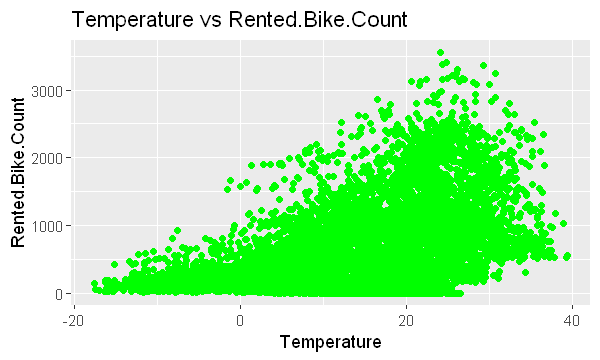

In [13]:
#plot for Temperature vs Rented.Bike.Count 
ggplot(train, aes(x = Temperature, y = Rented.Bike.Count)) +
    geom_point(color='green')+ggtitle("Temperature vs Rented.Bike.Count ")

From the plot above, it can be definitely said that the demand increases as temperature reaches 30. After it exceeds 30 the demand starts to drop as people do nor prefer riding bicycles on hot days. Similary low temperatures reduce the demand of bicycles.

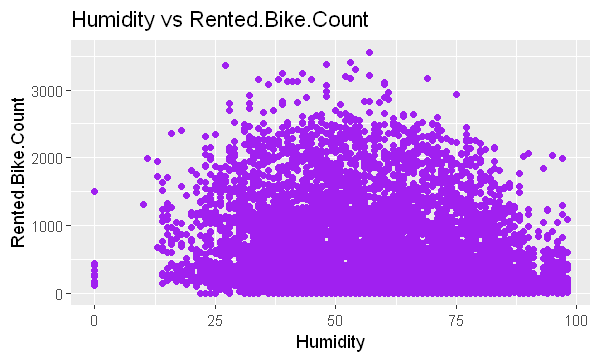

In [14]:
#plot for Humidity vs Rented.Bike.Count 
ggplot(train, aes(x = Humidity, y = Rented.Bike.Count)) +
    geom_point(color='purple')+ggtitle("Humidity vs Rented.Bike.Count ")

There is a high demand of bicycles when the humidity is between 20-60. As the humidity increases more beyond 60 the demand decreases. This might be becacause more humid the weather, the harder it is to  ride a bicycle as it makes the rider sweat more than often which leads to the rider being tired.

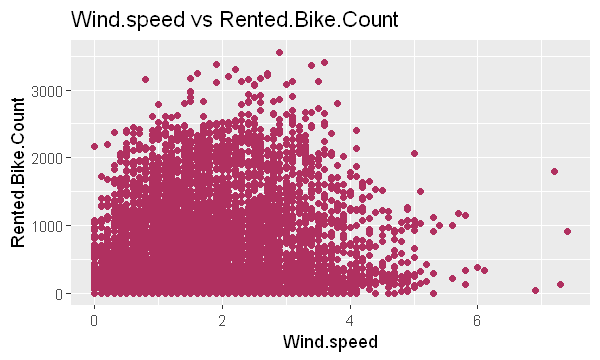

In [15]:
#plot for Wind.speed vs Rented.Bike.Count 
ggplot(train, aes(x = Wind.speed, y = Rented.Bike.Count)) +
    geom_point(color='maroon')+ggtitle("Wind.speed vs Rented.Bike.Count ")


From the graph above it is clear that more wind speeds equals less demands for bicycle.

<b>Let's take a look at the strongest correlation i.e. Temperature and Due.point.temperature</b>

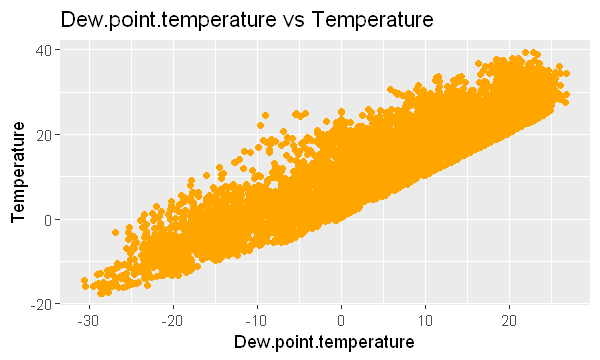

In [16]:
#plot forDew.point.temperature vs Temperature
ggplot(train, aes(x = Dew.point.temperature, y = Temperature)) +
    geom_point(color='orange')+ggtitle("Dew.point.temperature vs Temperature ")



From the plot, it is clear that Temperature and Dew.Point.temperature go hand in hand. As Temperature increases the Dew.point.Temp increases.

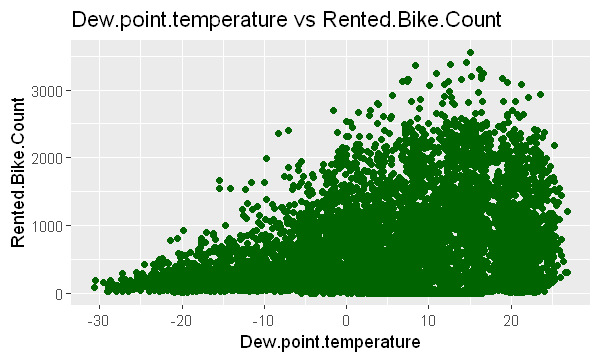

In [17]:
#plot for Dew.point.temperature vs Rented.Bike.Count
ggplot(train, aes(x = Dew.point.temperature, y = Rented.Bike.Count)) +
    geom_point(color='darkgreen')+ggtitle("Dew.point.temperature vs Rented.Bike.Count ")


Dew point temperature has a positive correlation with Rented.Bike.Count. The demand increase as the dew point temperature increases.But after a limit the demand starts to decrease. Now, from the temperature and Rented.Bike.Count from above, it was clear that the demand increases when the temperature is uptill 30. We also know that temperature and Dew Point temperature are strongly positively correlated. Hence it can be concluded that, as the temperature increases, the dew point temperature also increases and thus the demand for bicycles may be more. Similarly, as the temperature goes above 30 the dew point temperature also increases which then leads to a lesser demand for bicycles.

<b>Similary we also compare Dew.point.temperature and humidity,</b>

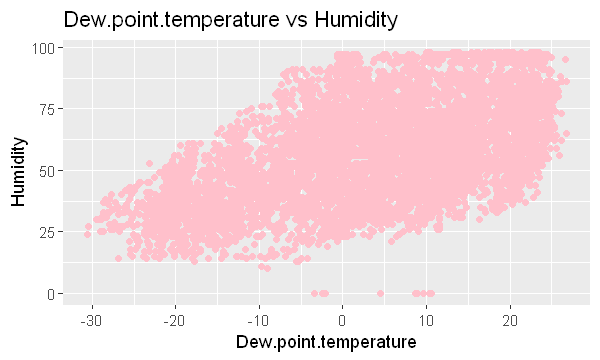

In [18]:
#plot for Dew.point.temperature vs Humidity
ggplot(train, aes(x = Dew.point.temperature, y = Humidity)) +
    geom_point(color='pink')+ggtitle("Dew.point.temperature vs Humidity ")

From the plot above, as the Dew.point.temperature increases, the humidity increases but after a particular limit in increase of Dew.point.temperature the humidity remains the same. Hence, it is safe to say that, as the temperature increases, the  Dew.point.temperature also increases and so does the humidity and so does our demand. When the temperature is too high i.e. above 30, the Dew.point.temperature also increases and hence the humidity also increases which then leads to a lesser demand.

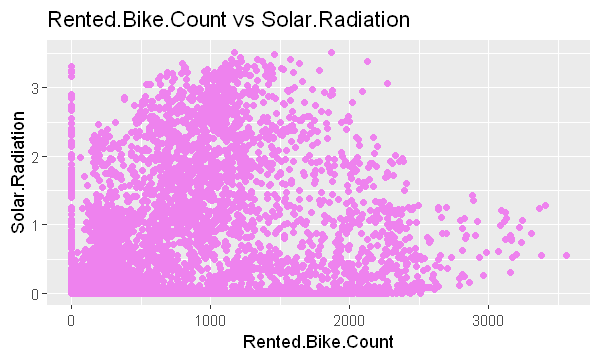

In [19]:
#plot for Rented.Bike.Count vs Solar.Radiation
ggplot(train, aes(x = Rented.Bike.Count, y = Solar.Radiation)) +
    geom_point(color='violet')+ggtitle("Rented.Bike.Count vs Solar.Radiation ")

From the graph above it can be concluded that lower the solar radiation, higher is our demand.

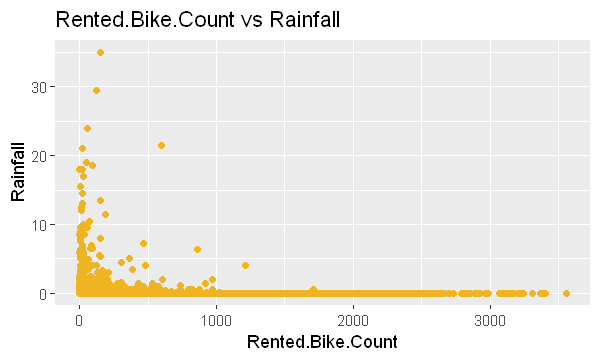

In [20]:
#plot for Rented.Bike.Count vs Rainfall
ggplot(train, aes(x = Rented.Bike.Count, y = Rainfall)) +
    geom_point(color='goldenrod2')+ggtitle("Rented.Bike.Count vs Rainfall ")



From the above plot, more the rainfall, less the demand because no on pefers to ride a bicycle in rain.

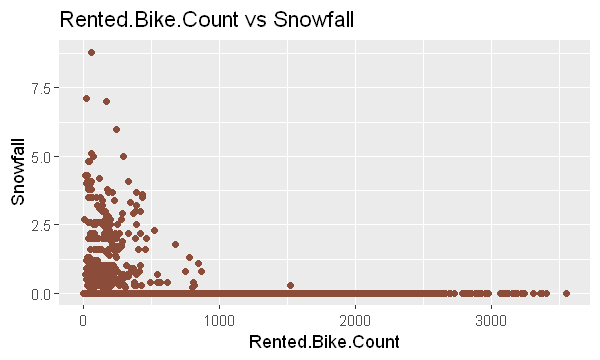

In [21]:
#plot for Rented.Bike.Count vs Snowfall
ggplot(train, aes(x = Rented.Bike.Count, y = Snowfall)) +
    geom_point(color='salmon4')+ggtitle("Rented.Bike.Count vs Snowfall ")

The plot above proves that lesser snowfall equals more demand.

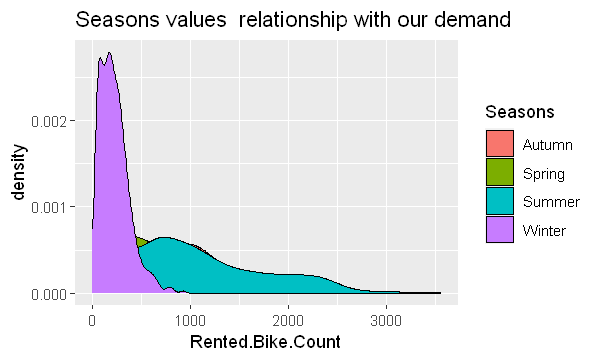

In [22]:
#plot for Seasons values  relationship with our demand
ggplot(aes(x = Rented.Bike.Count),data = train) + 
    geom_density(aes(fill = Seasons)) +

    ggtitle('Seasons values  relationship with our demand')

From the density graph, there is more demand of bicycles during winters. The demand is comparatively less during summer, autumn and spring.

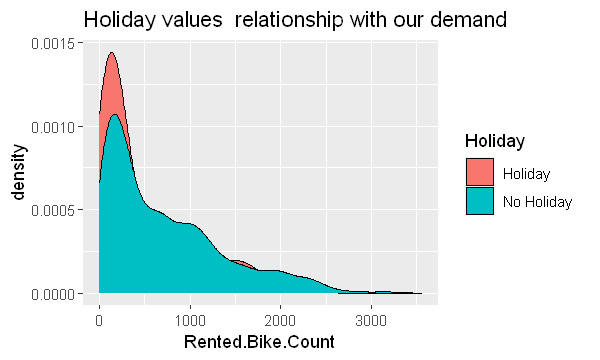

In [23]:
#plot for Holiday values  relationship with our demand
ggplot(aes(x = Rented.Bike.Count),data = train) + 
    geom_density(aes(fill = Holiday)) +

    ggtitle('Holiday values  relationship with our demand')

As we can see from the above graph the demand is high on public holidays.

From the analysis of the train dataset carried out, it can be concluded that Hour,Temperature,Dew.point.temperature,Humidity and solar radiation play a very pivotal role in determining the demand for bicycles. Variables such as rainfall, snowfall, Functioning day, Season play an important role but are not as effective as the variables mentioned before.

## Model Development <a class="anchor" id="sec_5"></a>

### Basic Model

After performing the exploratory data analysis of the parameters that are involved in our model, I was able to undesrtand the functionality of each variable, correlations between them and also predict certain significant variables before building the model.
Now, I believe that a basic linear regression model would be a good beginning to model our data and predict the demand as it provides a detailed description of what the model is doing. Moreover, parameters such as  Estimate, Std. Error ,t value and Pr(>|t|) help in understanding which vaiables are pivotal in predicting our demand accurately. The following code is for the basic linear regression model:

First off, we know that our demand is skewed. Hence we use sqrt(Rented.Bike.Count) while building the model. By making use of the sqrt function,we reduce the skewness and maintain the variable's underlying distribution.

In [24]:
fit1 <- lm(sqrt(Rented.Bike.Count) ~ ., data=train)  # implement the model
summary(fit1)   # print model summary


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9576  -3.8303  -0.3646   3.6244  23.2107 

Coefficients: (4 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.598e+00  3.914e+00  -1.175 0.240143    
Date1/10/18            6.424e+00  2.523e+00   2.546 0.010932 *  
Date1/11/18            9.747e+00  2.363e+00   4.125 3.75e-05 ***
Date1/12/17            7.171e+00  2.178e+00   3.293 0.000996 ***
Date1/2/18             3.087e+00  2.298e+00   1.343 0.179226    
Date1/3/18             3.626e+00  2.336e+00   1.552 0.120628    
Date1/4/18             2.946e+00  2.383e+00   1.236 0.216409    
Date1/5/18             6.745e+00  2.457e+00   2.746 0.006054 ** 
Date1/6/18             2.718e+00  2.506e+00   1.084 0.278198    
Date1/7/18            -1.469e+01  2.581e+00  -5.690 1.32e-08 ***
Date1/8/18            -1.326e+01  2.766e+00  -4.792 1.69e-06 *

The output has the following characteristics: residuals, coefficients, residual standard error, Multiple R-squared, Adjusted R-squared, and F-statistic and p-values. These  characteristics are useful to determine the accuracy of our model.

The adjusted R-squared value indicates this model explains 74.51% of the variation in demand(Rented.Bike.Count).

The F-statistic  55.77  has a p-value < 2.2e-16 meaning that the model is useful. The farther the F-statistic is from 1 the better our model.

 The p-values show if the variables in our model are significant or not. Some entries of the date parameter are significant wheras, some are not. Similarly, Seasons and Holiday parameters are not significant.


As we noticed that Holiday and Seasons variables are of no use. Hence, we need to remove such unimportant parameters from the model. To do this we use the step function backwards. The step function removes all the unimportant variables and thus reduces the model complexity and helps improve model performance.

In [25]:
basic_mod<-step(fit1) # removes all the unimportant variables 
summary(basic_mod)

Start:  AIC=26180.46
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Holiday + Functioning.Day


Step:  AIC=26180.46
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Functioning.Day


Step:  AIC=26180.46
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Functioning.Day

                         Df Sum of Sq    RSS   AIC
<none>                                263968 26181
- Wind.speed              1       316 264284 26187
- Dew.point.temperature   1       340 264308 26188
- Snowfall                1       473 264441 26191
- Functioning.Day         1      1320 265288 26213
- Humidity                1      2421 266389 26242
- Te


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Dew.point.temperature + 
    Solar.Radiation + Rainfall + Snowfall + Functioning.Day, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.9576  -3.8303  -0.3646   3.6244  23.2107 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.598e+00  3.914e+00  -1.175 0.240143    
Date1/10/18            6.424e+00  2.523e+00   2.546 0.010932 *  
Date1/11/18            9.747e+00  2.363e+00   4.125 3.75e-05 ***
Date1/12/17            7.171e+00  2.178e+00   3.293 0.000996 ***
Date1/2/18             3.087e+00  2.298e+00   1.343 0.179226    
Date1/3/18             3.626e+00  2.336e+00   1.552 0.120628    
Date1/4/18             2.946e+00  2.383e+00   1.236 0.216409    
Date1/5/18             6.745e+00  2.457e+00   2.746 0.006054 ** 
Date1/6/18             2.718e+00  2.506e+00   1.084 0.278198    
Date1/7/18

Running step in backward direction has removed all the variables that are unsignificant such as Seasons and Holiday. This has reduced model complexity like I mentioned earlier. The is no significant change in model performance as Adjusted R-squared, F-statistic and p-values for the model do not change.

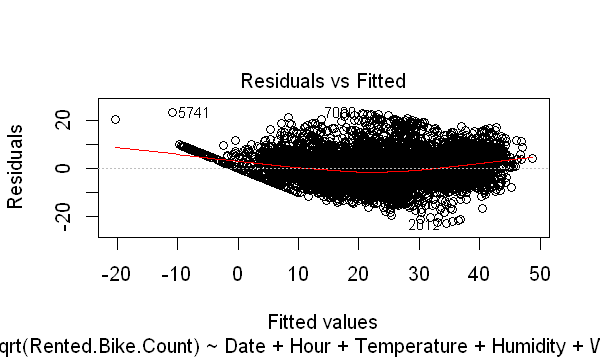

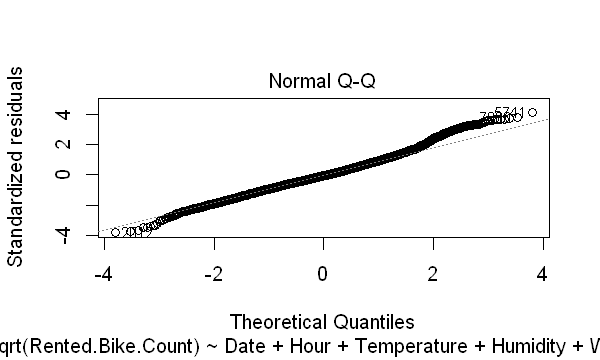

In [26]:
plot(basic_mod, which = 1)  # plot residual vs fitted graph
plot(basic_mod, which = 2) # plot normal Q-Q plot

1. From the plot of Residual vs Fitted it is clear that residuals are evenly distributed as the fitted value increases.
2. From the Normal Q-Q plot the residuals are along the dashed line but move away from it towards the end. This means that the residuals are normally distributed with some variatons at the start and the end.

### First Model

The basic model was built to understand all the parameters of model development. Now, we shall build our first model. This model is also a linear regression model. In this, we apply sqrt() to various model parameters such as Humidity, Visibility, rainfall etc. because of their skewness. As mentioned earlier using the sqrt function reduces the range and maintains the underlying distribution of the variables.

In [27]:
fit2 <- lm(sqrt(Rented.Bike.Count) ~ . +sqrt(Humidity)+sqrt(Visibility)
           +sqrt(Solar.Radiation)
           +sqrt(Rainfall)+sqrt(Snowfall)+sqrt(Wind.speed), data=train)
summary(fit2)


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ . + sqrt(Humidity) + sqrt(Visibility) + 
    sqrt(Solar.Radiation) + sqrt(Rainfall) + sqrt(Snowfall) + 
    sqrt(Wind.speed), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6521  -3.6095  -0.5046   3.6092  21.1133 

Coefficients: (4 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -23.804469   4.116038  -5.783 7.66e-09 ***
Date1/10/18             8.450468   2.336832   3.616 0.000301 ***
Date1/11/18            10.937941   2.186922   5.002 5.83e-07 ***
Date1/12/17             7.213296   2.014383   3.581 0.000345 ***
Date1/2/18              0.517652   2.175309   0.238 0.811914    
Date1/3/18              4.634834   2.168585   2.137 0.032613 *  
Date1/4/18              3.365536   2.208787   1.524 0.127631    
Date1/5/18              7.475064   2.277170   3.283 0.001034 ** 
Date1/6/18              5.843875   2.322366   2.516 0.011881 *  
Date

Looking at the summary of the model it is now clear that,
The adjusted R-squared value indicates this model explains 78.2% of the variation in demand(Rented.Bike.Count) which is better than 74.51% (adjusted R-squared for our basic model).
Similarly,
The F-statistic 67.14 has a p-value < 2.2e-16 which is definitely better than 55.77(F-statistic for our basic model).

According to the p-values, variables sqrt(Visibility) ,Seasons,Holiday,Dew.point.temperature are unsignificant. Hence to improve our model we need to remove these variables. To do this, we use the step function backwards like we did earlier.

In [28]:
mod1<-step(fit2)   # reomove unignificant variables
summary(mod1)

Start:  AIC=25091.11
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Holiday + Functioning.Day + 
    sqrt(Humidity) + sqrt(Visibility) + sqrt(Solar.Radiation) + 
    sqrt(Rainfall) + sqrt(Snowfall) + sqrt(Wind.speed)


Step:  AIC=25091.11
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Functioning.Day + sqrt(Humidity) + 
    sqrt(Visibility) + sqrt(Solar.Radiation) + sqrt(Rainfall) + 
    sqrt(Snowfall) + sqrt(Wind.speed)


Step:  AIC=25091.11
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Functioning.Day + sqrt(Humidity) + 
    sqrt(Visibility) + sqrt(Solar.Radiation) + sqrt(Rainfall) + 
    sqrt(Snowfall) + sqrt(Wind.


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day + sqrt(Humidity) + sqrt(Solar.Radiation) + 
    sqrt(Rainfall) + sqrt(Snowfall) + sqrt(Wind.speed), data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6548  -3.6149  -0.4947   3.6073  21.1295 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.227e+01  3.572e+00  -6.235 4.81e-10 ***
Date1/10/18            8.272e+00  2.323e+00   3.561 0.000372 ***
Date1/11/18            1.086e+01  2.182e+00   4.974 6.72e-07 ***
Date1/12/17            7.234e+00  2.014e+00   3.592 0.000330 ***
Date1/2/18             5.457e-01  2.175e+00   0.251 0.801873    
Date1/3/18             4.650e+00  2.166e+00   2.147 0.031869 *  
Date1/4/18             3.255e+00  2.195e+00   1.483 0.138037    
Date1/5/18             7.274e+00  2.258e+00   3.221 0.001283 ** 
Date1

After running the step function on the first model:
all the unsignificant variables have been removed. Moreover, I believe that there is a slight increase in the performance of the model as the Adjusted R-squared value is the same as before. There is however a slight increase in F-statistic value to 67.5 from 67.14. This is a good sign as even a slight increase in this value is an assurity that model performance has improved.
The p-values again indicate that some values of Date parameter are not significant.

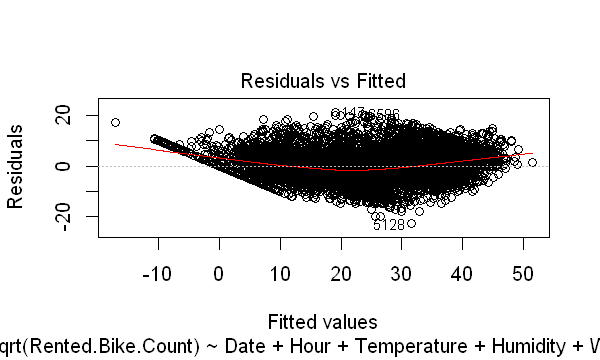

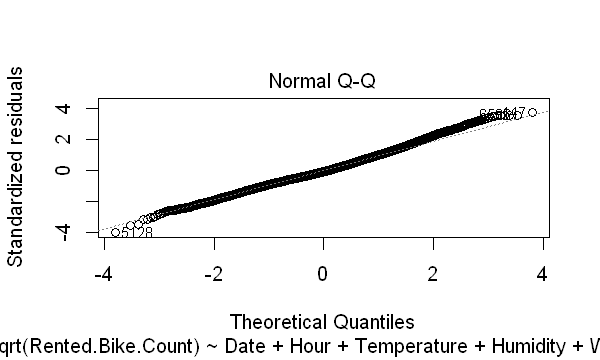

In [29]:
plot(mod1, which = 1)  #  Residual vs Fitted plot for model 1
plot(mod1, which = 2)  # normal Q-Q plot for model 1

From the plot of Residual vs Fitted it is clear that residuals are evenly distributed as the fitted value increases.
There is a linear relationship between Rented.Bike.Count and all the predictors, as the residuals are scattered evenly.
From the Normal Q-Q plot the residuals are along the dashed line but slightly deviate from the line towards the end. This means that the residuals are normally distributed with some variatons at the start and the end.

### Second Model

The second model is also a linear regression model. Here I'll be improving the accuracy of the first model by using the product of two parameters. This product is not taken on a trial and error basis. I have combined 2 parameters only if they have a positive correlation. I believe that this approach is better than  to just randomly combine 2 parameters and see whether it produces a better result or not.

Like the first model, I have used sqrt() on the parameters that are skewed and also added the product of parameters to it. As we know from the correlation graph in EDA, Temperature and Dew.point.temperature have a strong positive correlation. Hence, I have added a product of  Temperature and Dew.point.temperature to the model. There were many such positive correlation instances between other variables as well, Temperature and Solar.Radiation, Humidity and Rainfall to name a few. So, I have included all such instances in the model. 

In [30]:
lm_fit2 <- lm(sqrt(Rented.Bike.Count)~.-Seasons+sqrt(Humidity)
              +sqrt(Visibility)+sqrt(Solar.Radiation)+sqrt(Rainfall)
              +sqrt(Snowfall)+sqrt(Wind.speed)
               +Hour:Temperature+Hour:Solar.Radiation+Hour:Visibility+Hour:Rainfall+
              Temperature:Humidity+Temperature:Dew.point.temperature
              +Temperature:Solar.Radiation+ Humidity:Rainfall
              +Humidity:Snowfall+Humidity:Seasons
              +Dew.point.temperature:Solar.Radiation+Dew.point.temperature:Rainfall,
data = train)
summary(lm_fit2)


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ . - Seasons + sqrt(Humidity) + 
    sqrt(Visibility) + sqrt(Solar.Radiation) + sqrt(Rainfall) + 
    sqrt(Snowfall) + sqrt(Wind.speed) + Hour:Temperature + Hour:Solar.Radiation + 
    Hour:Visibility + Hour:Rainfall + Temperature:Humidity + 
    Temperature:Dew.point.temperature + Temperature:Solar.Radiation + 
    Humidity:Rainfall + Humidity:Snowfall + Humidity:Seasons + 
    Dew.point.temperature:Solar.Radiation + Dew.point.temperature:Rainfall, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6026  -3.1849  -0.4165   2.9380  20.2539 

Coefficients: (1 not defined because of singularities)
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -2.885e+01  4.065e+00  -7.096 1.42e-12
Date1/10/18                            1.280e+01  2.489e+00   5.142 2.79e-07
Date1/11/18                            1.483e+01  2.348e+00   6.315 2.88e-10
Date1/12/17   

As I had aimed to do, the accuracy of the second model is better than that of the first model.
The adjusted R-squared value indicates this model explains 80.62% of the variation in demand(Rented.Bike.Count). This is better than the first model where the adjusted R-squared was at 78.2%. 

The F-statistic 74.96 has a p-value < 2.2e-16.This is again better than 67.5, the F-statistic for first model.

The p-values again indicate that there are unsignificant variables in the model such as Humidity:Rainfall, sqrt(Snowfall),sqrt(Visibility),Dew.point.temperature,Holiday,Visibility etc. Hence we use step function backwards to deal with all these variables.

In [31]:
mod2<-step(lm_fit2)  # removes all the unimportant variables 
summary(mod2)

Start:  AIC=24280.36
sqrt(Rented.Bike.Count) ~ (Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Seasons + Holiday + Functioning.Day) - 
    Seasons + sqrt(Humidity) + sqrt(Visibility) + sqrt(Solar.Radiation) + 
    sqrt(Rainfall) + sqrt(Snowfall) + sqrt(Wind.speed) + Hour:Temperature + 
    Hour:Solar.Radiation + Hour:Visibility + Hour:Rainfall + 
    Temperature:Humidity + Temperature:Dew.point.temperature + 
    Temperature:Solar.Radiation + Humidity:Rainfall + Humidity:Snowfall + 
    Humidity:Seasons + Dew.point.temperature:Solar.Radiation + 
    Dew.point.temperature:Rainfall


Step:  AIC=24280.36
sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + Humidity + 
    Wind.speed + Visibility + Dew.point.temperature + Solar.Radiation + 
    Rainfall + Snowfall + Functioning.Day + sqrt(Humidity) + 
    sqrt(Visibility) + sqrt(Solar.Radiation) + sqrt(Rainfall) + 
    sqrt(Snowfall) + sqrt(Wind.sp


Call:
lm(formula = sqrt(Rented.Bike.Count) ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Dew.point.temperature + 
    Solar.Radiation + Rainfall + Snowfall + Functioning.Day + 
    sqrt(Humidity) + sqrt(Solar.Radiation) + sqrt(Rainfall) + 
    sqrt(Wind.speed) + Hour:Temperature + Hour:Solar.Radiation + 
    Hour:Visibility + Hour:Rainfall + Temperature:Humidity + 
    Temperature:Dew.point.temperature + Temperature:Solar.Radiation + 
    Humidity:Snowfall + Humidity:Seasons + Dew.point.temperature:Solar.Radiation + 
    Dew.point.temperature:Rainfall, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.6885  -3.2051  -0.4298   2.9491  20.2412 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -2.916e+01  3.863e+00  -7.548 5.00e-14
Date1/10/18                            1.303e+01  2.478e+00   5.258 1.50e-07
Date1/11/18                            1.505e+01  

As we can see, all the unsignificant variables are now removed. Moreover the peformance of the model remains the same with a slight increase in the F-statistic to 75.53 from 74.96. However, the complexity of the model decreases marginally.

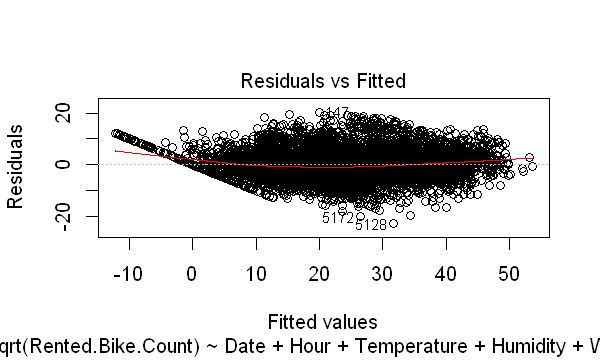

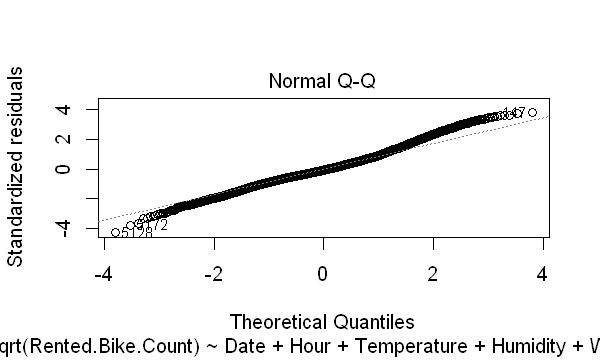

In [32]:
plot(mod2, which = 1) #  Residual vs Fitted plot for model 2
plot(mod2, which = 2)  # Normal Q-Q plot for model 2

Again, the plot of Residual vs. Fitted is similar to that of the first model. However, for the Normal Q-Q plot the residuals deviate more from the dashed line as compared to the first model.

### Comparison of models

We use the anova() function to compare the 3 models above.

In [33]:
anova(basic_mod,mod1,mod2)

Res.Df RSS      Df Sum of Sq F         Pr(>F)       
1 6633   263968.1 NA       NA         NA            NA
2 6629   225599.1  4 38369.00  316.96119 7.032309e-250
3 6616   200221.1 13 25377.98   64.50589 1.747013e-160

RSS measures the amount of error remaining between the regression function and the data set. After comparing the 3 models obtained above, The RSS value of the second model is better than the other two models(basic model and first model). Hence we choose this model to predict values of out demand. Moreover, there might be cases when the RSS values of models may be equal. In such cases we look at the p-values. The lower the p-value the better the model. In the above case, suppose that the RSS value of first model and second model were similar we would make a decision based on p-values. If we compare the p-values of first model and second model ,the first model has a lesser p-value as compared to the second model. Hence, we would choose the first model in such cases.

Since we are using the second model for prediction purposes after conducting the anova test, we will calculate the average MSE for it.

In [34]:
predmod2<-predict(basic_mod,test)  # predict deman based on test data

In [35]:
avgMSE= mean(predmod2-sqrt(test$Rented.Bike.Count))^2   # calcukate average MSE
avgMSE

[1] 0.005303696

The predictions that are in the predmod2 variable are in the form of sqrt(Rented.Bike.Count). Hence, while calculating the MSE we need to subtract sqrt(demand) from predicted values in order to get the MSE.

### Result

The MSE for our second linear regression model is 0.00530. We know that the lower the MSE the better the model.
The value of MSE is very low which indicates that the model is predicting most of the values accurately. Moreover, our adjusted R2 is 0.8062 which indicates that the model has good predicting powers.

## Conclusion <a class="anchor" id="sec_7"></a>

The goal of this assignment was to predict the demand. I,thus, can say that my model can predict the demand with an accuracy of 80.62%. To achieve this, we first explored the dataset for outliers, skewness in variables and then check the correlation between them. We explored each and every variable against our demand and made predictions before developing the model. Some predictions were when temperature rises the demand increases. The demand is also dependent on the Hour variable. After exploring all the variables in detail, we jumped on to the process of model development. I used 2 linear regression models with different parameters to predict the demand. The reason I used linear regression models is because they give a detailed statistical description of what the model is doing. The first model contained all the parameters along with the variables wrapped in sqrt() function. This was done eliminate the skewness the variables executed. Then we used the step function to eliminate the variables that were not significant. This hence developed my first model. Coming on to the second model, the same process was followed except the fact that the model used product of variables along with the variables wrapped in sqrt() function. This was done to increase the accuracy of the model. The product of variables was selected on the basis of positive correlation. The step function was then used to remove unsignificant variables. After the 2 models were obtained we used the anova function to comare the models. The comparison showed that the second model was better at predicting the demand. Hence we used it to predict the demand values. Even though the accuracy of the model that was selected(second model) is 0.8062, which is good, I still believe that the model suffers from overfitting sometimes. This might be because the model has previous knowledge about the Date i.e. what was the demand on a particular date? This hence leads to my model overfitting the values for a particular date. I believe this could have been resolved by using just the Month or Year from the Date column as Date and then fit the model.But, the reason I kept the Date column as is because more parameters in the model could sometimes lead to an increase in performance of the model  even if makes the model complex.

## References <a class="anchor" id="sec_8"></a>

1. https://lms.monash.edu/mod/resource/view.php?id=7438727
2. https://lms.monash.edu/mod/resource/view.php?id=7438745
3. https://www.guru99.com/r-anova-tutorial.html
4. https://www.investopedia.com/terms/r/residual-sum-of-squares.asp#:~:text=A%20residual%20sum%20of%20squares,explained%20by%20a%20regression%20model.&text=The%20residual%20sum%20of%20squares%20measures%20the%20amount%20of%20error,function%20and%20the%20data%20set.
5. http://rstudio-pubs-static.s3.amazonaws.com/24803_abbae17a5e154b259f6f9225da6dade0.html
6. https://rpubs.com/Bilal_Mahmood/EDA